## Healthcare Dataset
This project will look at a synthetic dataset to see what story it tells about the non-real patient population.

Data can be found at this website:
[Healthcare Dataset](https://www.kaggle.com/datasets/prasad22/healthcare-dataset)

### Virtual Environment

| Command  | Linux/Mac | PC - GitBash |
|--------- | --------- | ------------ | 
| Create   | python3 -m venv venv | python -m venv venv|
| Activate | source venv/bin/activate | source venv/Scripts/activate |
| Install | pip install -r requirements.txt or pip install packages | pip install -r requirements.txt or pip install packages |
| Deactivate | deactivate | deactivate|

In [2]:
# This section will have all items/tools that will need to be imported in the project
import pandas as pd
import locale

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prasad22/healthcare-dataset")

print("Path to dataset files:", path)

/Users/luckyc/Documents/PROJECTS/healthcare_data/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/luckyc/.cache/kagglehub/datasets/prasad22/healthcare-dataset/versions/2


### Healthcare Dataset
1. Read in dataset
2. Review the dataset
3. Clean the dataset

In [4]:
# Read in dataset
health_data = pd.read_csv("healthcare_dataset.csv")

In [5]:
# Checking the info relating to the data - A good way to see snapshot of data as well as checking for null values
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [6]:
# A snapshot of the statistics within the dataset
health_data.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [7]:
# Checking rows and column count
health_data.shape

(55500, 15)

In [8]:
# checking first few  rows
health_data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [9]:
# Since the dataset is synthetic, there is no need for name column to have names and I will be converting to integers

unique_names = health_data['Name'].unique()
name_to_int = {name: i for i, name in enumerate(unique_names)}
health_data['name_int'] = health_data['Name'].map(name_to_int)

In [10]:
# Checking first few rows
health_data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,name_int
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,0
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,1
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,2
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,3
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,4


In [11]:
# dropping columns not needed 
cols_to_drop = ['Name', 'Room Number', 'Medication']

health_data_dropped = health_data.drop(columns= cols_to_drop)

In [12]:
# view first few rows
health_data_dropped.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Test Results,name_int
0,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,Urgent,2024-02-02,Normal,0
1,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,Emergency,2019-08-26,Inconclusive,1
2,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,Emergency,2022-10-07,Normal,2
3,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,Elective,2020-12-18,Abnormal,3
4,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,Urgent,2022-10-09,Abnormal,4


In [13]:
# Moving a column name_int to beginning

health_data_dropped = health_data_dropped[['name_int'] + [col for col in health_data_dropped.columns if col != 'name_int']]


In [14]:
# updating Billing Amount to show 2 after decimal
health_data_dropped['Billing Amount'] = health_data_dropped['Billing Amount'].round(2)

# Use a supported locale – this usually works on macOS/Linux:
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# when exported this will show $
health_data_dropped['Billing Amount USD'] = health_data_dropped['Billing Amount'].apply(
    lambda x: locale.currency(x, grouping=True))


In [15]:
# viewing changes
health_data_dropped.head()

,name_int,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Test Results,Billing Amount USD
0,0,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28,Urgent,2024-02-02,Normal,"$18,856.28"
1,1,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,Emergency,2019-08-26,Inconclusive,"$33,643.33"
2,2,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.10,Emergency,2022-10-07,Normal,"$27,955.10"
3,3,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78,Elective,2020-12-18,Abnormal,"$37,909.78"
4,4,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,Urgent,2022-10-09,Abnormal,"$14,238.32"


In [16]:
health_data_clean = health_data_dropped

health_data_clean.to_csv('health_data_clean.csv',index=False)

### Reviewing Data

1. Create a new column looking at typical performance indicator of Length of Stay (LOS)
2. Calculate Average Length of Stay (ALOS)


In [17]:

# Convert both columns to datetime
health_data_clean['Date of Admission'] = pd.to_datetime(health_data_clean['Date of Admission'])
health_data_clean['Discharge Date'] = pd.to_datetime(health_data_clean['Discharge Date'])

# Establish length of stay (LOS) and create a column
health_data_clean['LOS'] = (health_data_clean['Discharge Date'] - health_data_clean['Date of Admission']).dt.days



In [18]:
health_data_clean.head()

,name_int,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Test Results,Billing Amount USD,LOS
0,0,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28,Urgent,2024-02-02,Normal,"$18,856.28",2
1,1,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,Emergency,2019-08-26,Inconclusive,"$33,643.33",6
2,2,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.10,Emergency,2022-10-07,Normal,"$27,955.10",15
3,3,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78,Elective,2020-12-18,Abnormal,"$37,909.78",30
4,4,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,Urgent,2022-10-09,Abnormal,"$14,238.32",20


In [19]:
# Determining ALOS for this dataset
average_los = health_data_clean['LOS'].mean()
print(f"Average Length of Stay: {average_los:.2f} days")


Average Length of Stay: 15.51 days


In [20]:
health_data_clean['LOS'].describe()


count    55500.000000
mean        15.509009
std          8.659600
min          1.000000
25%          8.000000
50%         15.000000
75%         23.000000
max         30.000000
Name: LOS, dtype: float64

In [21]:
# Creating a Function for ALOS
def alos(df, column):
    """
    Determines the Average Length of Stay (ALOS) grouped by a specified column.

    Parameters:
    df : pd.DataFrame
        The dataframe containing the LOS and group column
    column : str
        The column name to group by (e.g., 'Gender', 'Medical Condition')

    Returns:
    pd.Series
        A series showing the average LOS for each group in the column
    """
    return df.groupby(column)['LOS'].mean().sort_values(ascending=False)


In [22]:
alos(health_data_clean, 'Medical Condition')

Medical Condition
Asthma          15.696570
Arthritis       15.517404
Cancer          15.495827
Obesity         15.464305
Hypertension    15.458626
Diabetes        15.422936
Name: LOS, dtype: float64

In [23]:
alos(health_data_clean, 'Insurance Provider')

Insurance Provider
Medicare            15.633046
Blue Cross          15.522109
Cigna               15.485910
UnitedHealthcare    15.455371
Aetna               15.447448
Name: LOS, dtype: float64

In [24]:
alos(health_data_clean, 'Gender')

Gender
Male      15.542198
Female    15.475763
Name: LOS, dtype: float64

In [25]:
alos(health_data_clean, 'Test Results')

Test Results
Normal          15.547875
Abnormal        15.509475
Inconclusive    15.469329
Name: LOS, dtype: float64

### Plots

1. Reviewing ALOS by Medical Condition and Insurance Provider
2. ALOS over time
3. Pivots of ALOS as well as Billing Amount
4. Line Graphs reviewing counts by Gender over various categories

In [26]:
# Imports for charting
import matplotlib.pyplot as plt
import seaborn as sns

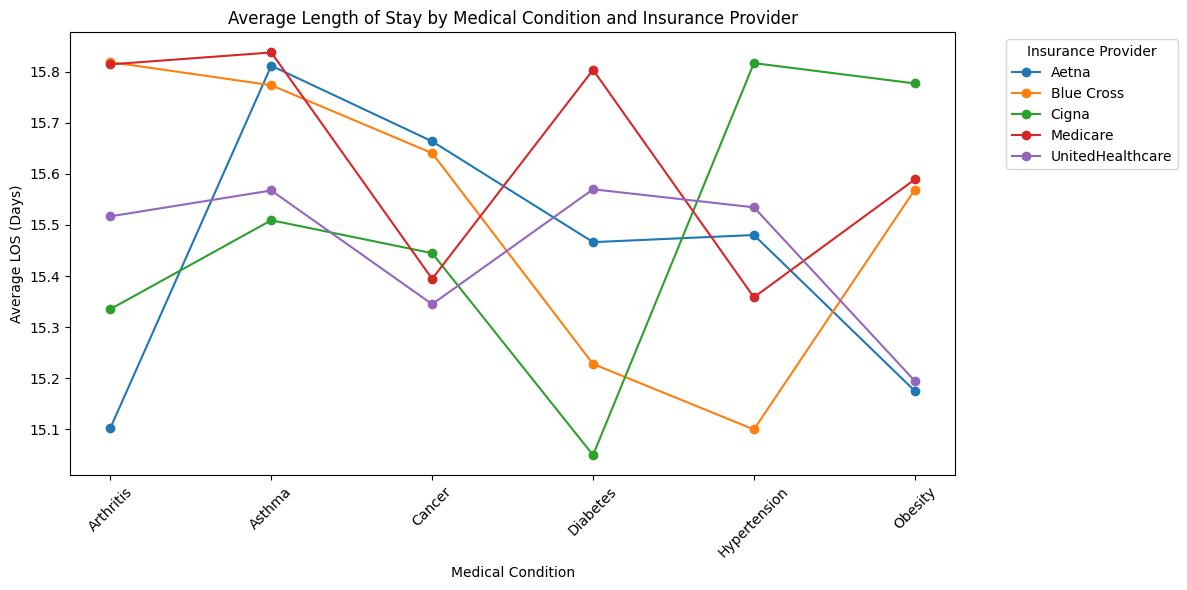

In [100]:
grouped = health_data_clean.groupby(['Medical Condition', 'Insurance Provider'])['LOS'].mean().unstack()

grouped.plot(kind='line', figsize=(12,6), marker='o')
plt.title('Average Length of Stay by Medical Condition and Insurance Provider')
plt.ylabel('Average LOS (Days)')
plt.xlabel('Medical Condition')
plt.xticks(rotation=45)
plt.legend(title='Insurance Provider', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


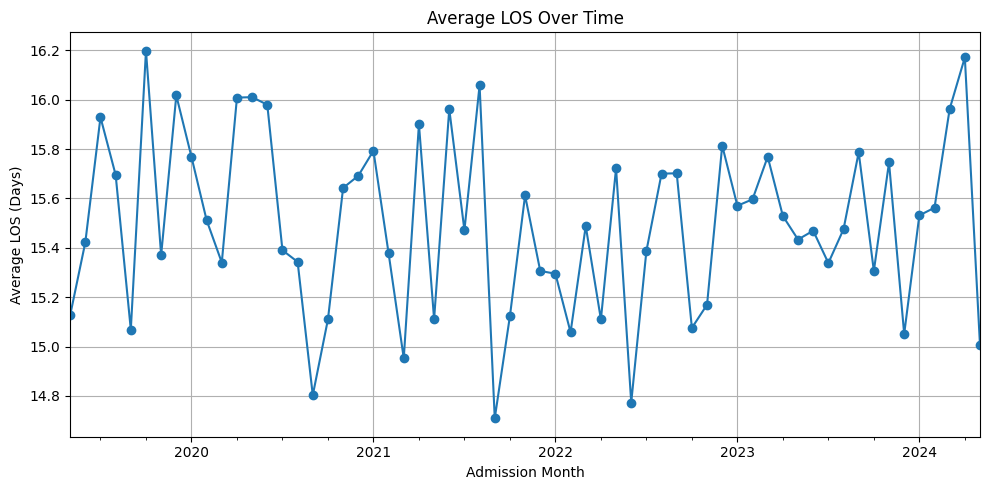

In [101]:
# convert to datetime if needed
health_data_clean['Date of Admission'] = pd.to_datetime(health_data_clean['Date of Admission'])

# Group by month and get average LOS
los_by_month = health_data_clean.groupby(health_data_clean['Date of Admission'].dt.to_period('M'))['LOS'].mean()

# Convert period index to timestamp for plotting
los_by_month.index = los_by_month.index.to_timestamp()

# Plot
los_by_month.plot(kind='line', marker='o', figsize=(10,5), title='Average LOS Over Time')
plt.ylabel('Average LOS (Days)')
plt.xlabel('Admission Month')
plt.grid(True)
plt.tight_layout()
plt.show()


In [61]:
health_data_clean.groupby('Gender')['LOS'].describe()


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,27726.0,15.475763,8.642820,1.0,8.0,15.0,23.0,30.0
Male,27774.0,15.542198,8.676348,1.0,8.0,15.0,23.0,30.0


In [79]:
def pivot(df, values, index, columns):
    """
    
    Provides pivot table for LOS across an index and column

    Parameters:
    df : The DataFrame containing the data needed
    values: LOS
    index: str
        Column to be used as index.
     column: str
        Column is how table is split up
    """
    result = pd.pivot_table(df, values=values, index=index, columns=columns)
    return result


In [80]:
pivot(health_data_clean, values= 'LOS', index='Insurance Provider', columns='Gender')

Gender,Female,Male
Insurance Provider,,
Aetna,15.370494,15.522329
Blue Cross,15.469182,15.575719
Cigna,15.410474,15.562087
Medicare,15.570404,15.695644
UnitedHealthcare,15.555836,15.355284


In [81]:
pivot(health_data_clean, values= 'LOS', index='Medical Condition', columns='Gender')

Gender,Female,Male
Medical Condition,,
Arthritis,15.440034,15.595846
Asthma,15.613002,15.778713
Cancer,15.626901,15.365405
Diabetes,15.373038,15.472813
Hypertension,15.362966,15.553853
Obesity,15.442233,15.486440


In [82]:
pivot(health_data_clean, values= 'LOS', index='Admission Type', columns='Gender')

Gender,Female,Male
Admission Type,,
Elective,15.403456,15.648422
Emergency,15.605149,15.584709
Urgent,15.418863,15.397550


In [83]:
pivot(health_data_clean, values= 'Billing Amount', index='Insurance Provider', columns='Gender')

Gender,Female,Male
Insurance Provider,,
Aetna,25368.683229,25732.932408
Blue Cross,25488.279235,25739.355710
Cigna,25586.913190,25464.018547
Medicare,25640.598843,25591.399740
UnitedHealthcare,25262.828601,25515.040050


#### Average Length of Stay (alos) 

The Average Length of Stay across dataset if 15.51 and when reviewed across multiple variations it remains within that range. Also reviewed Billing Amount to see if any significant difference and did not notice anything super useful.

In [107]:
def line(df, column1, column2):
    """
    Plots line graph based on two columns

    Parameters:
    df : The DataFrame containing the relevant columns.
    column1: str
        First column to group by (e.g., 'Gender', 'Insurance Provider').
    column2: str
        Second column to group by (e.g., 'Gender', 'Insurance Provider').

    Returns a line plot
    """
    # Get counts of each group combination
    count_data = df.groupby([column1, column2]).size().unstack()

    # Plotting
    count_data.plot(kind='line', marker='o', figsize=(12, 6))

    plt.title(f'Count by {column1} and {column2}')
    plt.ylabel('Patient Count')
    plt.xlabel(column1)
    plt.xticks(rotation=45)
    plt.legend(title=column2, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


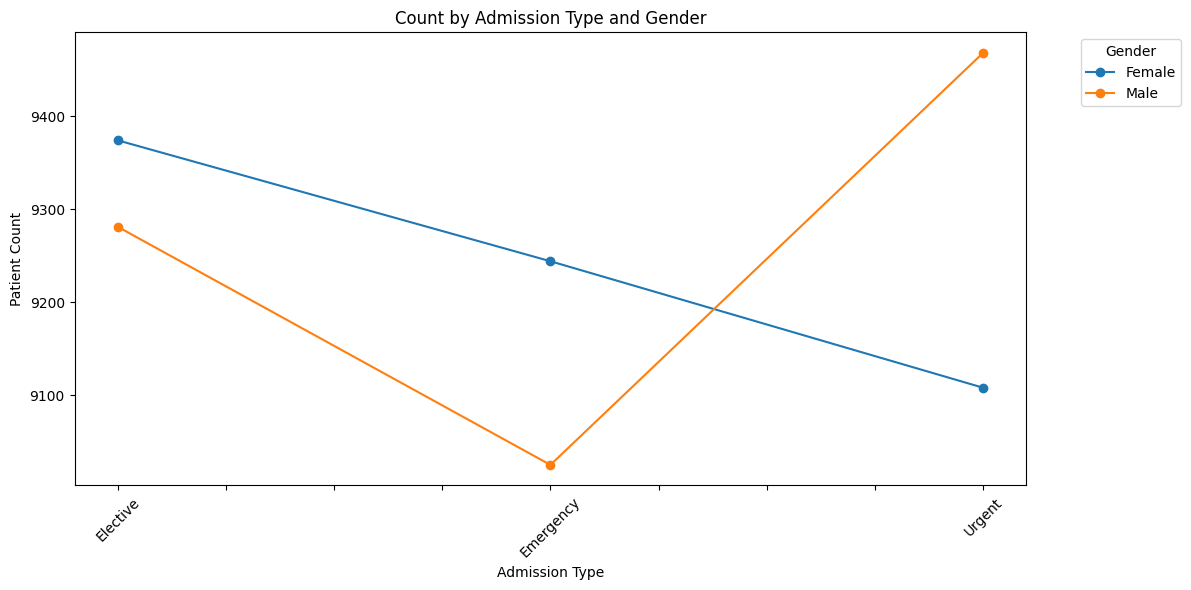

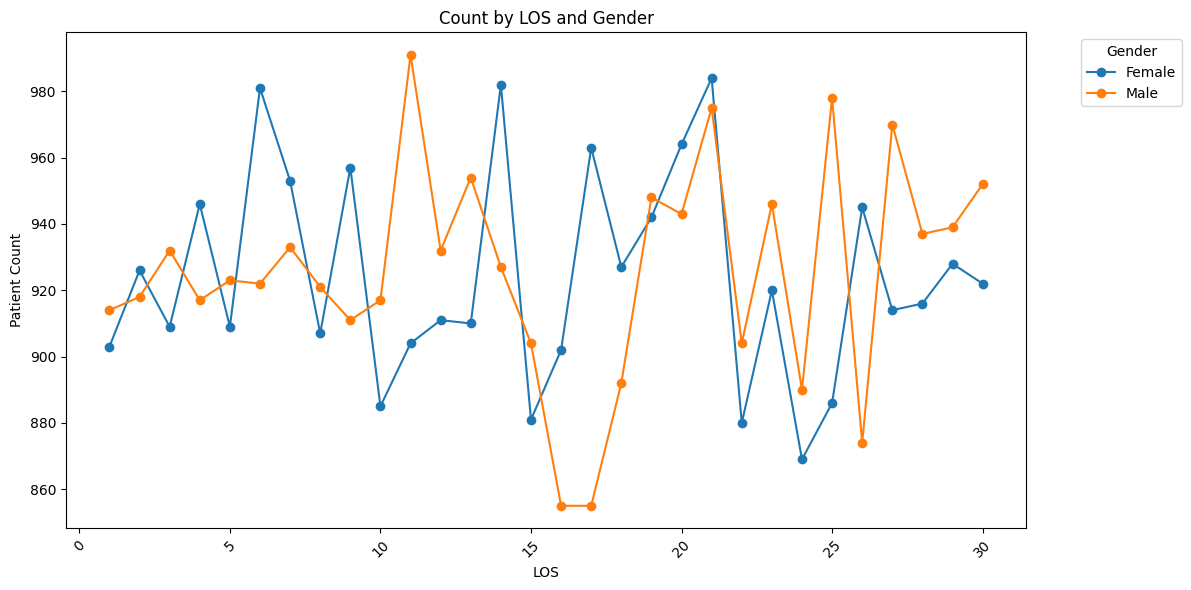

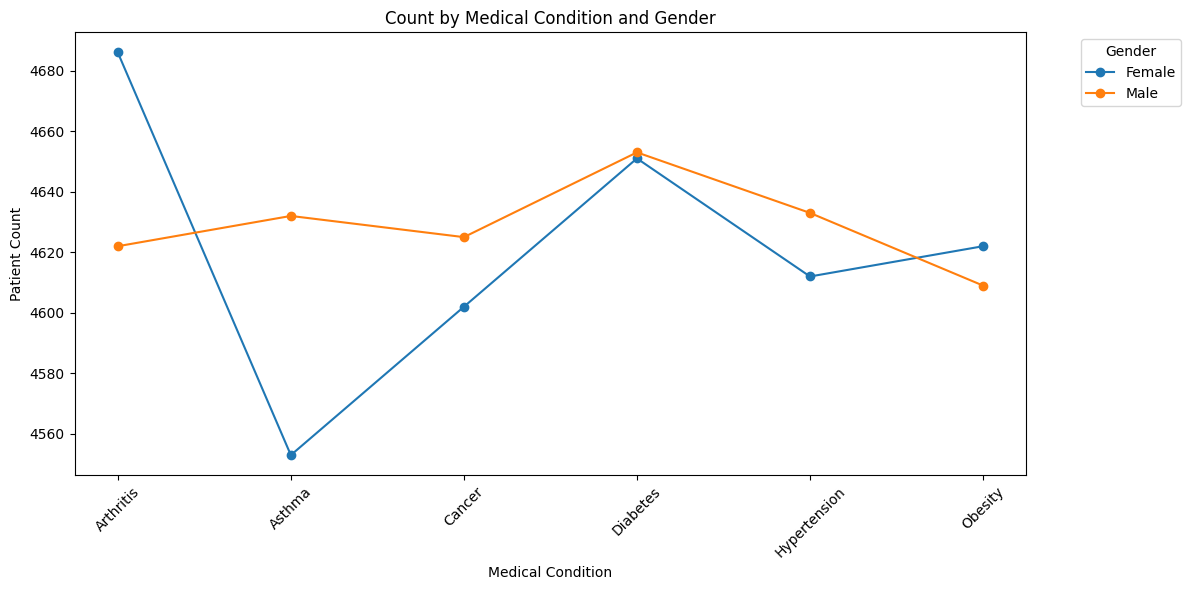

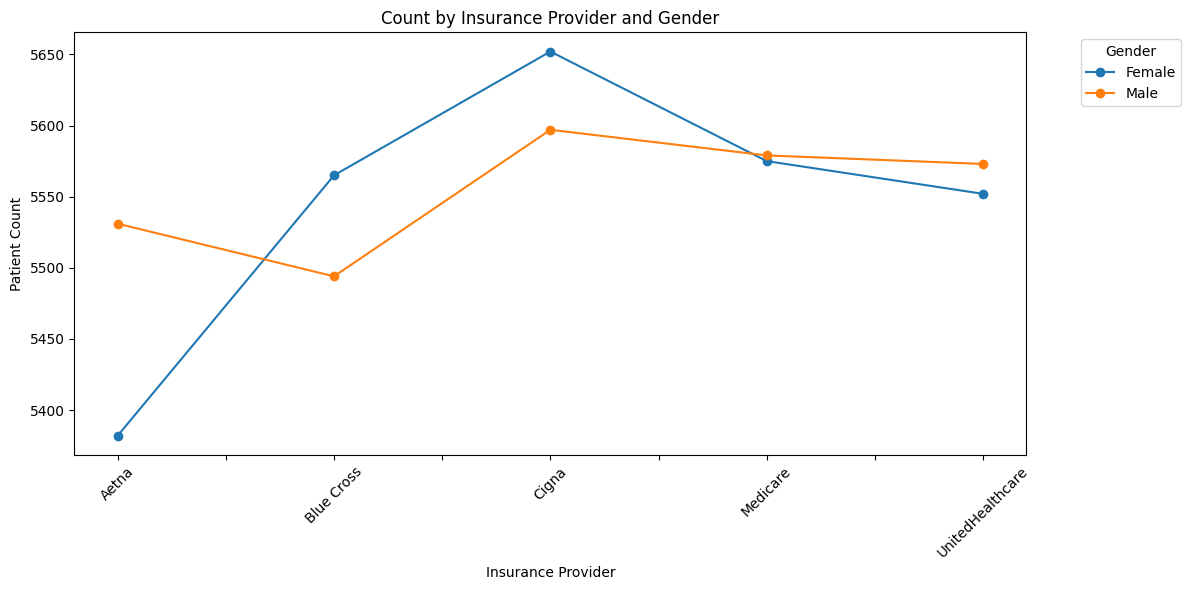

In [103]:
line(health_data_clean,'Admission Type', 'Gender')
line(health_data_clean,'LOS', 'Gender')
line(health_data,'Medical Condition', 'Gender')
line(health_data_clean,'Insurance Provider', 'Gender')


#### Additional KPI Metrics

In [104]:
average_cost = health_data_clean['Billing Amount'].mean()
print(f"Average Cost per Discharge: ${average_cost:,.2f}")


Average Cost per Discharge: $25,539.32


In [108]:
# Create a function to retrieve avg_costs across variable groupby
def avg_cost(df, group, amount):
    """ 
    This function will print average cost by group according to amount

    parameters:
    df: The Dataframe with the information needed
    group: The column that data will be grouped by
    amount: the Billing Amount

    returns: result
    """
    result = df.groupby(group)[amount].mean()
    return result

   

In [111]:
avg_cost(health_data_clean, 'Gender', 'Billing Amount')


Gender
Female    25470.652938
Male      25607.860538
Name: Billing Amount, dtype: float64

In [112]:
avg_cost(health_data_clean, 'Insurance Provider', 'Billing Amount')

Insurance Provider
Aetna               25553.294446
Blue Cross          25613.011503
Cigna               25525.766305
Medicare            25615.990470
UnitedHealthcare    25389.172368
Name: Billing Amount, dtype: float64

In [113]:
avg_cost(health_data_clean, 'Admission Type', 'Billing Amount')

Admission Type
Elective     25602.226258
Emergency    25497.397131
Urgent       25517.364498
Name: Billing Amount, dtype: float64

In [114]:
avg_cost(health_data_clean, 'Doctor', 'Billing Amount')


Doctor
Aaron Acevedo      29047.28
Aaron Adams        20162.26
Aaron Aguilar       8091.81
Aaron Alexander    22120.87
Aaron Anderson     40326.06
                     ...   
Zoe Khan           25569.20
Zoe Knight         33601.00
Zoe Nichols        34217.90
Zoe Roberts        38594.42
Zoe Wallace        22018.47
Name: Billing Amount, Length: 40341, dtype: float64

In [117]:
# Group by Doctor and sum the billing amounts
total_billing_by_doctor = health_data_clean.groupby('Doctor')['Billing Amount'].sum()

# Sort descending to find the top doctor
top_billing_doctor = total_billing_by_doctor.sort_values(ascending=False)

# Doctor with the highest total billing
print(top_billing_doctor.head(1))  


Doctor
Michael Smith    784501.82
Name: Billing Amount, dtype: float64


In [106]:
health_data_clean['Cost per Day'] = health_data_clean['Billing Amount'] / health_data_clean['LOS']

# Now get the average cost per day across all patients
avg_cost_per_day = health_data_clean['Cost per Day'].mean()
print(f"Average Cost per Day: ${avg_cost_per_day:,.2f}")


Average Cost per Day: $3,386.40


### Conclusions

Reviewing the information by count and specific patient population there was more of a story to tell with differences as it relates to gender.

Females are more likely to seek elective and emergency treatment, and less likely to seek urgent care. Males show the opposite trend—more likely to seek urgent care, and less likely to pursue elective or emergency treatment.

The Average Length of stay is 15.51 days

Doctor Michael Smith had the highest billing at $784,501.82

#### Limitation

There are many limitations within this dataset:
1. The patient population is almost evenly split with the following:
    - Gender
    - Insurance Provider
    - Average Length of Stay between the two above
2. There is no account for patient population that may be uninsured or underinsured. 
3. The billing amount is also very similar between the patient population

These limitations make it tricky to be able to pinpoint trends with length of stay. 


### Dashboard Image

![dashboard](dashboard_image.png)